

### Packages Needed

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the csv data

In [2]:
df=pd.read_csv('./oasis_longitudinal.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


- EDUC : Years of education
- SES  : Socioeconomic Status
- MMSE : Mini Mental State Examination
- CDR  : Clinical Dementia Rating
- eTIV : Estimated Total Intracranial Volume
- nWBV : Normalize Whole Brain Volume
- ASF  : Atlas Scaling Factor

### Data Analysis

In [3]:
df = df.loc[df['Visit']==1] 
df = df.reset_index(drop=True) 
df['M/F'] = df['M/F'].replace(['F','M'], [0,1]) 
df['Group'] = df['Group'].replace(['Converted'], ['Demented']) 
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0]) 
df = df.drop(['MRI ID', 'Visit', 'Hand'], axis=1)

### function for ploting bar diagram

In [4]:
def bar_chart(feature):
    Demented = df[df['Group']==1][feature].value_counts()
    Nondemented = df[df['Group']==0][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))


Text(0.5, 1.0, 'Gender and Demented rate')

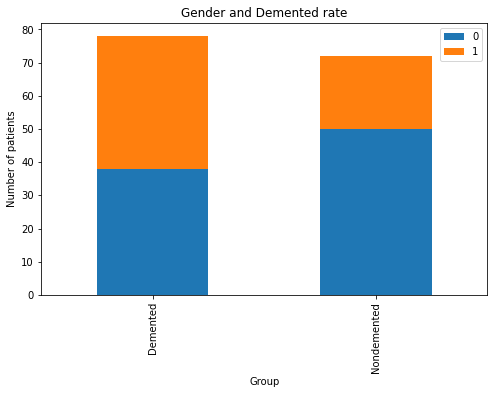

In [5]:
# Gender  and  Group ( Femal=0, Male=1)
bar_chart('M/F')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Gender and Demented rate')



The above graph indicates that men are more likely with dementia than women.


(47.0, 105.0)

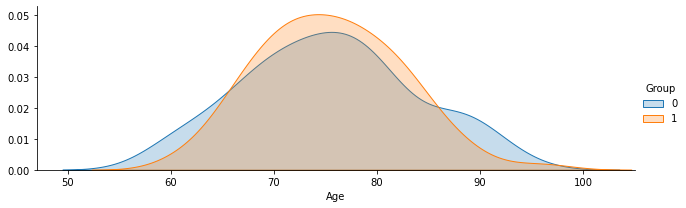

In [6]:
#AGE. Nondemented =0, Demented =1
facet= sb.FacetGrid(df,hue="Group", aspect=3)
facet.map(sb.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(47,105)

There is a higher concentration of 70-80 years old in the Demented patient group than those in the nondemented patients. We guess patients who suffered from that kind of disease has lower survival rate so that there are a few of 90 years old.

(15.0, 30.0)

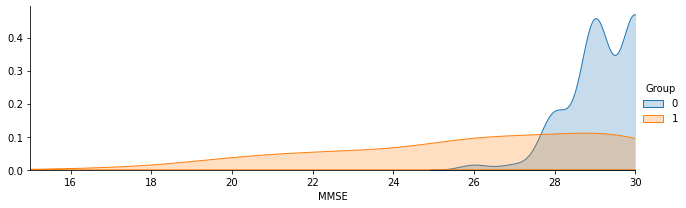

In [7]:
#MMSE : Mini Mental State Examination
# Nondemented = 0, Demented =1
facet= sb.FacetGrid(df,hue="Group", aspect=3)
facet.map(sb.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(15)



The chart shows Nondemented group got much more higher MMSE scores than Demented group.


(0.5, 2.0)

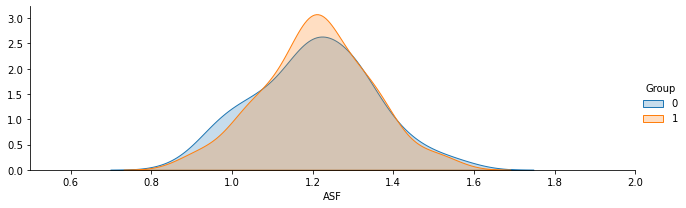

In [8]:
#bar_chart('ASF') = Atlas Scaling Factor
# Nondemented = 0, Demented =1
facet= sb.FacetGrid(df,hue="Group", aspect=3)
facet.map(sb.kdeplot,'ASF',shade= True)
facet.set(xlim=(0, df['ASF'].max()))
facet.add_legend()
plt.xlim(0.5, 2)

(800.0, 2300.0)

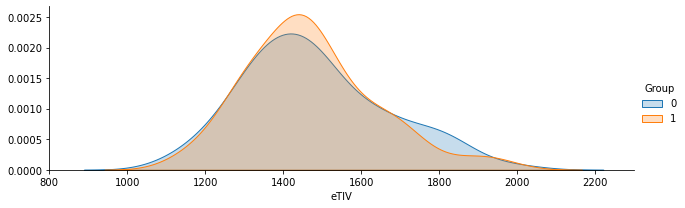

In [9]:
#eTIV = Estimated Total Intracranial Volume
# Nondemented = 0, Demented =1
facet= sb.FacetGrid(df,hue="Group", aspect=3)
facet.map(sb.kdeplot,'eTIV',shade= True)
facet.set(xlim=(0, df['eTIV'].max()))
facet.add_legend()
plt.xlim(800, 2300)

(0.6, 0.9)

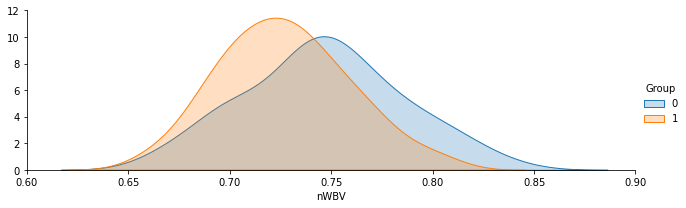

In [10]:
#'nWBV' = Normalized Whole Brain Volume
# Nondemented = 0, Demented =1
facet= sb.FacetGrid(df,hue="Group", aspect=3)
facet.map(sb.kdeplot,'nWBV',shade= True)
facet.set(xlim=(0, df['nWBV'].max()))
facet.add_legend()
plt.xlim(0.6,0.9)

The chart indicates that Nondemented group has higher brain volume ratio than Demented group. This is assumed to be because the diseases affect the brain to be shrinking its tissue.

(0.0, 0.16)

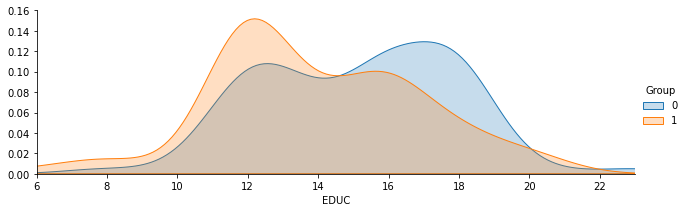

In [11]:
#'EDUC' = Years of Education
# Nondemented = 0, Demented =1
facet= sb.FacetGrid(df,hue="Group", aspect=3)
facet.map(sb.kdeplot,'EDUC',shade= True)
facet.set(xlim=(df['EDUC'].min(), df['EDUC'].max()))
facet.add_legend()
plt.ylim(0, 0.16)

### Observations
  
  - Following are the intermediate result summary obtained after visualisations
   
    - Men are more likely with demented, an Alzheimer's Disease, than Women.
    - Higher concentration of 70-80 years old in Demented group than those in the nondemented patients.
    - Nondemented group has higher brain volume than Demented group.
    - Demented patients were less educated in terms of years of education.


### Data Preprocessing

In [12]:
# handling missing values
df_dropna = df.dropna(axis=0, how='any')
pd.isnull(df_dropna).sum()

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [13]:
# Data Balance Check
df_dropna['Group'].value_counts()

0    72
1    70
Name: Group, dtype: int64

### Decision Tree Classifier

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc

In [15]:
Y = df_dropna['Group'].values 
X = df_dropna[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, random_state=0)

scaler = MinMaxScaler().fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
best_score = 0
kfolds=5
for md in range(1, 9):
    treeModel = DecisionTreeClassifier(random_state=0, max_depth=md, criterion='gini')
    scores = cross_val_score(treeModel, X_train_scaled, Y_train, cv=kfolds, scoring='accuracy')
    score = np.mean(scores) 

    if score > best_score:
        best_score = score
        best_parameter = md

In [17]:
SelectedDTModel = DecisionTreeClassifier(max_depth=best_parameter).fit(X_train_scaled, Y_train)

In [18]:
test_score = SelectedDTModel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedDTModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)

In [19]:
print("Best accuracy on validation set is:", best_score)
print("Test recall with best parameters is ", test_recall)
print("Test AUC with the best parameter is ", test_auc)

Best accuracy on validation set is: 0.7445887445887446
Test recall with best parameters is  0.8235294117647058
Test AUC with the best parameter is  0.9117647058823529


###  Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
best_score = 0

for M in range(2, 15, 2): # combines M trees
    for d in range(1, 9): # maximum number of features considered at each split
        for m in range(1, 9): # maximum depth of the tree
            # train the model
            # n_jobs(4) is the number of parallel computing
            forestModel = RandomForestClassifier(n_estimators=M, max_features=d, n_jobs=4,
                                          max_depth=m, random_state=0)
        
            # perform cross-validation
            scores = cross_val_score(forestModel, X_train_scaled, Y_train, cv=kfolds, scoring='accuracy')

            # compute mean cross-validation accuracy
            score = np.mean(scores)

            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score
                best_M = M
                best_d = d
                best_m = m





In [ ]:
# Rebuild a model on the combined training and validation set        
SelectedRFModel = RandomForestClassifier(n_estimators=M, max_features=d,
                                          max_depth=m, random_state=0).fit(X_train_scaled, Y_train )

In [ ]:
PredictedOutput = SelectedRFModel.predict(X_test_scaled)
test_score = SelectedRFModel.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Test recall with the best parameters is:", test_recall)
print("Test AUC with the best parameters is:", test_auc)

## clustering

In [20]:
df_long=df_dropna

In [17]:
df2=pd.read_csv('./oasis_cross-sectional.csv')

In [18]:
df2 = df2.reset_index(drop=True) 
df2['M/F'] = df2['M/F'].replace(['F','M'], [0,1]) 
df2 = df2.drop(['Hand', 'Delay','SES','CDR','ID','Educ','MMSE','ASF'], axis=1)

In [19]:
df2=df2.dropna()

In [20]:
df2.head()

,M/F,Age,eTIV,nWBV
0,0,74,1344,0.743
1,0,55,1147,0.810
2,0,73,1454,0.708
3,1,28,1588,0.803
4,1,18,1737,0.848


In [21]:
#df_cdr2=df2[df2['CDR']==0]

In [22]:
from sklearn.cluster import KMeans

In [23]:
km = KMeans(n_clusters = 4, random_state=90)

In [24]:
km.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=90, tol=0.0001, verbose=0)

In [25]:
km.cluster_centers_

array([[1.90839695e-01, 5.63587786e+01, 1.40323664e+03, 7.87557252e-01],
       [4.96503497e-01, 4.53216783e+01, 1.53259441e+03, 7.98986014e-01],
       [8.00000000e-01, 4.88941176e+01, 1.71923529e+03, 7.85588235e-01],
       [5.19480519e-02, 5.67792208e+01, 1.25970130e+03, 7.91792208e-01]])

In [26]:
cluster=km.labels_

In [27]:
cluster

array([0, 3, 0, 1, 2, 3, 1, 1, 2, 3, 1, 2, 1, 2, 1, 2, 2, 1, 3, 2, 0, 0,
       3, 3, 3, 0, 2, 0, 0, 2, 3, 1, 0, 3, 0, 0, 3, 0, 2, 1, 0, 1, 0, 0,
       3, 0, 1, 0, 0, 1, 0, 3, 0, 1, 0, 1, 2, 0, 2, 1, 3, 3, 1, 1, 2, 3,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 3, 0, 3, 0, 3, 3, 1, 1, 2, 2, 0, 0,
       1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 3, 2, 2, 3, 1, 2, 1, 1, 0, 2, 0, 2,
       1, 2, 2, 0, 3, 2, 1, 1, 1, 1, 0, 2, 1, 3, 1, 1, 3, 1, 2, 1, 0, 1,
       1, 0, 2, 2, 1, 2, 1, 1, 0, 1, 2, 0, 1, 3, 1, 0, 2, 0, 3, 2, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 3, 3, 1, 3, 1, 2, 1, 3, 2, 0, 2, 1, 0,
       3, 1, 0, 3, 0, 1, 0, 0, 1, 0, 0, 2, 3, 2, 0, 3, 2, 2, 1, 0, 2, 1,
       0, 3, 3, 1, 3, 2, 0, 2, 3, 1, 3, 1, 0, 1, 0, 1, 0, 3, 3, 1, 0, 3,
       0, 1, 0, 1, 3, 3, 1, 2, 3, 0, 2, 1, 0, 2, 0, 1, 2, 1, 0, 2, 1, 1,
       1, 3, 3, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 3, 0, 0, 2, 3,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 1, 0, 0, 0, 0, 0, 0, 3, 1, 2, 1,
       1, 1, 2, 1, 1, 0, 0, 0, 3, 2, 0, 3, 0, 0, 2,

In [28]:
X=df2

In [29]:
y_kmeans = km.predict(X)

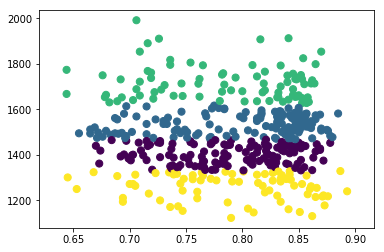

In [155]:
import matplotlib.pyplot as plt
plt.scatter(df2['nWBV'],df2['eTIV'], c=y_kmeans, s=50, cmap='viridis')

centers = km.cluster_centers_

In [30]:
df2['clusters']=cluster

In [33]:
df_cl0=df2[df2['clusters']==0]
df_cl1=df2[df2['clusters']==1]
df_cl2=df2[df2['clusters']==2]
df_cl3=df2[df2['clusters']==3]

In [40]:
df_cl0.describe()

,M/F,Age,eTIV,nWBV,clusters
count,131.000000,131.000000,131.000000,131.000000,131.0
mean,0.190840,56.358779,1403.236641,0.787557,0.0
std,0.394471,22.751862,40.189902,0.052921,0.0
min,0.000000,19.000000,1332.000000,0.670000,0.0
25%,0.000000,33.000000,1369.000000,0.746500,0.0
50%,0.000000,62.000000,1402.000000,0.789000,0.0
75%,0.000000,74.000000,1440.500000,0.831000,0.0
max,1.000000,96.000000,1467.000000,0.878000,0.0


In [41]:
df_cl1.describe()

,M/F,Age,eTIV,nWBV,clusters
count,143.000000,143.000000,143.000000,143.000000,143.0
mean,0.496503,45.321678,1532.594406,0.798986,1.0
std,0.501745,25.898665,41.715542,0.062355,0.0
min,0.000000,18.000000,1469.000000,0.655000,1.0
25%,0.000000,22.000000,1497.000000,0.750000,1.0
50%,0.000000,31.000000,1525.000000,0.830000,1.0
75%,1.000000,72.000000,1569.000000,0.846000,1.0
max,1.000000,94.000000,1617.000000,0.885000,1.0


In [42]:
df_cl2.describe()

,M/F,Age,eTIV,nWBV,clusters
count,85.000000,85.000000,85.000000,85.000000,85.0
mean,0.800000,48.894118,1719.235294,0.785588,2.0
std,0.402374,26.414743,76.694143,0.063917,0.0
min,0.000000,18.000000,1628.000000,0.644000,2.0
25%,1.000000,22.000000,1657.000000,0.726000,2.0
50%,1.000000,48.000000,1711.000000,0.802000,2.0
75%,1.000000,75.000000,1753.000000,0.845000,2.0
max,1.000000,92.000000,1992.000000,0.870000,2.0


In [43]:
df_cl3.describe()

,M/F,Age,eTIV,nWBV,clusters
count,77.000000,77.000000,77.000000,77.000000,77.0
mean,0.051948,56.779221,1259.701299,0.791792,3.0
std,0.223377,24.430688,56.496405,0.061808,0.0
min,0.000000,18.000000,1123.000000,0.645000,3.0
25%,0.000000,28.000000,1219.000000,0.745000,3.0
50%,0.000000,65.000000,1272.000000,0.801000,3.0
75%,0.000000,78.000000,1311.000000,0.842000,3.0
max,1.000000,93.000000,1329.000000,0.893000,3.0


Estimated Total Intracranial Volume can be used as a benchmark for pointing each cluster point to a perticluar level of alzheimers. The average **Cranial Volume** of modern man is greater than 1500cc.   


https://www.maropeng.co.za/content/page/the-human-brain

- cluster0 : level 2
- cluster1 : level 1
- cluster2 : level 0
- cluster3 : level 3

In [55]:
level=[]
for i in cluster:
    if i==0:
        level.append(2)
    elif i==1:
        level.append(1)
    elif i==2:
        level.append(0)
    else:
        level.append(3)        

In [57]:
df2['level']=level

(1000, 1992)

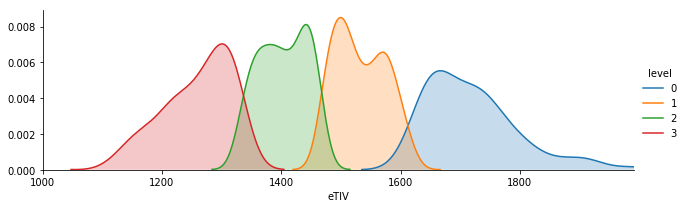

In [75]:
facet= sb.FacetGrid(df2,hue="level", aspect=3)
facet.map(sb.kdeplot,'eTIV',shade= True)
facet.set(xlim=(0, df2['eTIV'].max()))
facet.add_legend()
plt.xlim(1000,1992)

from above figure
- eTIV ranging from 1100 to <1350 can be considered as level 3 alzheimers 
- similarly all levels